# **Credit Card Fraud Detection**

### **Context**
#### *It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.*

### **Content**
#### The dataset contains transactions made by credit cards in September 2013 by European cardholders.
#### This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

#### It contains only numerical input variables which are the result of a PCA (Principal Component Analysis) transformation. Unfortunately, due to confidentiality issues, the original features and more background information about the data hasn't been provided. 

 Note: *Principal Component Analysis is a popular unsupervised learning technique for reducing the dimensionality of data.*

#### Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

###  Importing Libraries

In [203]:
import numpy as np  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
pd.set_option('display.max_columns', None)

### Load the dataset and read the csv file using Pandas.

In [204]:
df = pd.read_csv("D:\Credit Card Fraud Detection\creditcard.csv")

### Information about the dataset

In [205]:
# First 5 rows of the dataset.
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [237]:
# Last 5 rows of the dataset.
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0



#### In *Class* column; 0 represents legit (non-fraud) transactions whereas 1 represents fraudulent transactions.

In [207]:
# Information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [208]:
# Check for missing values.

df.isnull().sum()

# We don't have any missing values.

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [209]:
# Legit Transactions vs Fraudulent Transactions

df['Class'].value_counts()

# 2,84,315 records show legit transactions and only 492 records show fraudulet transactions
# which indicated that the dataset is unbalanced and feeding the data as it is to the machine learning model will result in incorreect predictions.

0    284315
1       492
Name: Class, dtype: int64

In [210]:
# Seperating the data for Analysis.

legit = df[df.Class == 0]
fraud = df[df.Class == 1]  

print(legit.shape, fraud.shape)

(284315, 31) (492, 31)


## **Distribution**

### Distribution of Fraud and Non-Fraud transactions.

Text(0.5, 1.0, 'Class Distribution\n0: Legit, 1: Fraud')

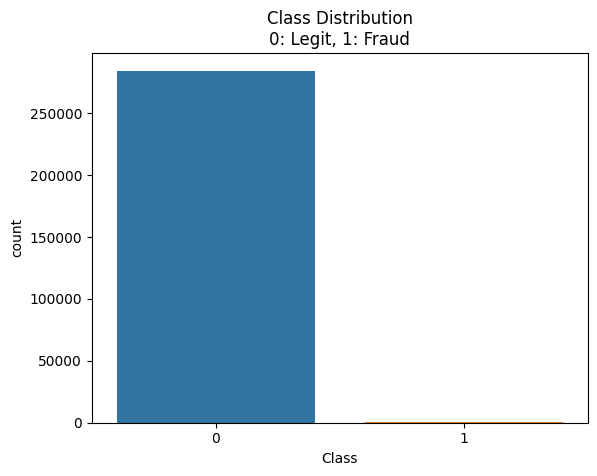

In [239]:
sns.countplot(x='Class', data= df)
plt.title("Class Distribution" "\n" "0: Legit, 1: Fraud")


### By seeing the distributions of Time and Amount, we can have an idea of how skewed these features are.

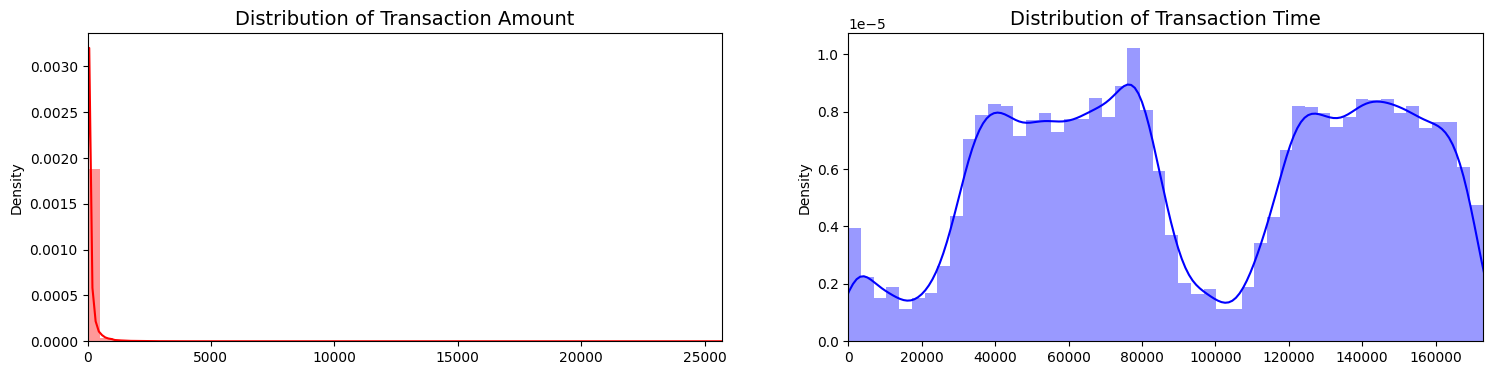

In [212]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])


plt.show()

In [213]:
# Statistical Info

print("Staistics of Legit Transaction:\n",legit.Amount.describe(),"\n\n","Statistics of Fraud Transaction:\n", fraud.Amount.describe())

Staistics of Legit Transaction:
 count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64 

 Statistics of Fraud Transaction:
 count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [214]:
# Compare values for both type of transactions using mean of each feature.

df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### The data is highly imbalanced as the number of legit (non-fraud) transactions are 284315 whereas the number of fraud transactions are 492. 

### Using the original dataframe will cause two major problems:
- **Over fitting:** Since the number of legit transactions is almost 577 times larger than the fraud transactions, our model will assume that in most cases no fraud occurs.

- **Wrong Correlation:** By using an imbalanced dataframe, true correlation between class and features would not be known. There are 27 such features (V1 to V27) and understanding which features have a strong correaltion with Class is important.


## **Random Under-Sampling**

### Random Under-Sampling consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.

Steps:
The first thing we have to do is determine how imbalanced is our class (use "value_counts()" on the class column to determine the amount for each label)
Once we determine how many instances are considered fraud transactions (Fraud = "1") , we should bring the non-fraud transactions to the same amount as fraud transactions (assuming we want a 50/50 ratio), this will be equivalent to 492 cases of fraud and 492 cases of non-fraud transactions.
After implementing this technique, we have a sub-sample of our dataframe with a 50/50 ratio with regards to our classes. 
Then the next step we will implement is to shuffle the data to see if our models can maintain a certain accuracy everytime we run this script.

*Note: The main issue with "Random Under-Sampling" is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of information loss (bringing 492 non-fraud transaction from 284,315 non-fraud transaction)*

In [215]:
legit_sample = legit.sample(n=492)
legit_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
80588,58557.0,0.981440,-0.780516,1.082248,0.583017,-1.389268,-0.169797,-0.675409,0.034338,-0.715219,0.644669,-0.055174,0.330225,0.763094,-0.106462,1.414457,-1.335293,-0.015582,0.951350,-1.854146,-0.278517,-0.211339,-0.355958,0.058554,0.351186,0.069614,-0.452642,0.076586,0.067002,137.25,0
187852,127717.0,-0.598398,0.309753,1.254221,-0.159055,0.138343,0.064498,0.604976,0.334705,0.181531,-0.606472,-0.188531,-0.751495,-2.728758,0.622739,-0.706000,0.885590,-1.118368,0.746050,-0.749628,-0.222442,-0.059422,-0.470509,0.210385,-0.562221,-0.675101,-1.129605,0.161533,0.185669,80.00,0
34516,37704.0,-3.073976,-4.390619,0.941011,-0.604751,-4.777473,2.597523,4.591282,-0.434131,-0.719177,-1.557457,-1.406336,-0.707598,1.126162,-1.594818,-1.313883,1.258260,0.039259,-0.548042,0.156659,3.454667,1.026779,0.698878,2.983029,-0.219218,1.126996,-0.203282,-0.582642,-0.046885,1471.97,0
161781,114517.0,0.055977,0.940435,0.254635,-0.630199,0.574534,-1.017085,1.079391,-0.258252,-0.194726,-0.441401,-0.877656,0.653506,1.097230,-0.107787,-0.508979,-0.100119,-0.522825,-0.830708,-0.035356,0.033084,-0.258289,-0.511597,0.037635,-0.088166,-0.433844,0.143897,0.254076,0.098171,2.69,0
65916,51802.0,-1.132280,0.063209,1.265294,-1.251925,-1.977198,1.578357,-2.504574,-5.121566,-1.173320,-1.221370,0.497330,1.090562,0.247907,-0.088304,-1.984332,1.677964,0.288663,-1.032285,0.216237,1.388648,-2.531679,0.732879,-0.669682,0.058042,1.172934,-0.262844,0.132969,0.158471,259.54,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55366,46905.0,0.500655,-1.467199,0.865128,0.392164,-1.383241,0.394316,-0.419207,0.252020,0.914753,-0.469941,1.286978,1.348023,-0.265640,-0.215509,-0.710308,-0.227455,0.265281,-0.576352,0.219783,0.527597,0.048507,-0.326573,-0.154288,0.310204,-0.115387,0.909199,-0.081387,0.057419,324.30,0
251364,155323.0,1.978627,-1.222865,-0.544764,-0.955633,-1.004796,-0.055695,-1.052071,0.127522,-0.145360,0.842774,0.981489,0.109317,-0.192895,-0.171123,-0.348666,1.438549,-0.062387,-1.026808,0.819603,0.119203,0.047956,-0.089093,0.363145,0.669815,-0.566363,-0.541533,-0.008425,-0.031937,80.96,0
175644,122427.0,2.237887,-0.687700,-1.498661,-0.780423,-0.486919,-1.352015,-0.212169,-0.470577,-0.466431,0.834361,-0.848887,-0.426475,0.397162,-0.136383,-0.381195,0.480059,0.361149,-1.366928,0.584601,-0.033378,0.553645,1.762208,-0.178006,0.088487,0.508359,0.291771,-0.041532,-0.074925,12.00,0
186879,127293.0,2.055234,-1.151824,-0.260925,-0.648327,-1.034765,0.460418,-1.354896,0.183812,0.061949,0.935946,-0.227467,0.662657,1.089515,-0.432875,-0.032209,-0.353385,-1.037859,2.156473,-0.425955,-0.445346,-0.311218,-0.346497,0.229033,-1.037615,-0.598095,0.526558,0.006515,-0.046975,39.85,0


In [216]:
new_df = pd.concat([legit_sample, fraud], axis=0) # Mentioning axis=0 will merge the data across rows, whereas axis=1 will merge the data across columns.

new_df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
80588,58557.0,0.981440,-0.780516,1.082248,0.583017,-1.389268,-0.169797,-0.675409,0.034338,-0.715219,0.644669,-0.055174,0.330225,0.763094,-0.106462,1.414457,-1.335293,-0.015582,0.951350,-1.854146,-0.278517,-0.211339,-0.355958,0.058554,0.351186,0.069614,-0.452642,0.076586,0.067002,137.25,0
187852,127717.0,-0.598398,0.309753,1.254221,-0.159055,0.138343,0.064498,0.604976,0.334705,0.181531,-0.606472,-0.188531,-0.751495,-2.728758,0.622739,-0.706000,0.885590,-1.118368,0.746050,-0.749628,-0.222442,-0.059422,-0.470509,0.210385,-0.562221,-0.675101,-1.129605,0.161533,0.185669,80.00,0
34516,37704.0,-3.073976,-4.390619,0.941011,-0.604751,-4.777473,2.597523,4.591282,-0.434131,-0.719177,-1.557457,-1.406336,-0.707598,1.126162,-1.594818,-1.313883,1.258260,0.039259,-0.548042,0.156659,3.454667,1.026779,0.698878,2.983029,-0.219218,1.126996,-0.203282,-0.582642,-0.046885,1471.97,0
161781,114517.0,0.055977,0.940435,0.254635,-0.630199,0.574534,-1.017085,1.079391,-0.258252,-0.194726,-0.441401,-0.877656,0.653506,1.097230,-0.107787,-0.508979,-0.100119,-0.522825,-0.830708,-0.035356,0.033084,-0.258289,-0.511597,0.037635,-0.088166,-0.433844,0.143897,0.254076,0.098171,2.69,0
65916,51802.0,-1.132280,0.063209,1.265294,-1.251925,-1.977198,1.578357,-2.504574,-5.121566,-1.173320,-1.221370,0.497330,1.090562,0.247907,-0.088304,-1.984332,1.677964,0.288663,-1.032285,0.216237,1.388648,-2.531679,0.732879,-0.669682,0.058042,1.172934,-0.262844,0.132969,0.158471,259.54,0


In [217]:
new_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,0.491140,0.728903,0.380428,-1.948883,-0.832498,0.519436,0.903562,1.197315,0.593509,-0.017652,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [218]:
new_df["Class"].value_counts()

0    492
1    492
Name: Class, dtype: int64

## Creating Heatmaps to understand Correlation. 

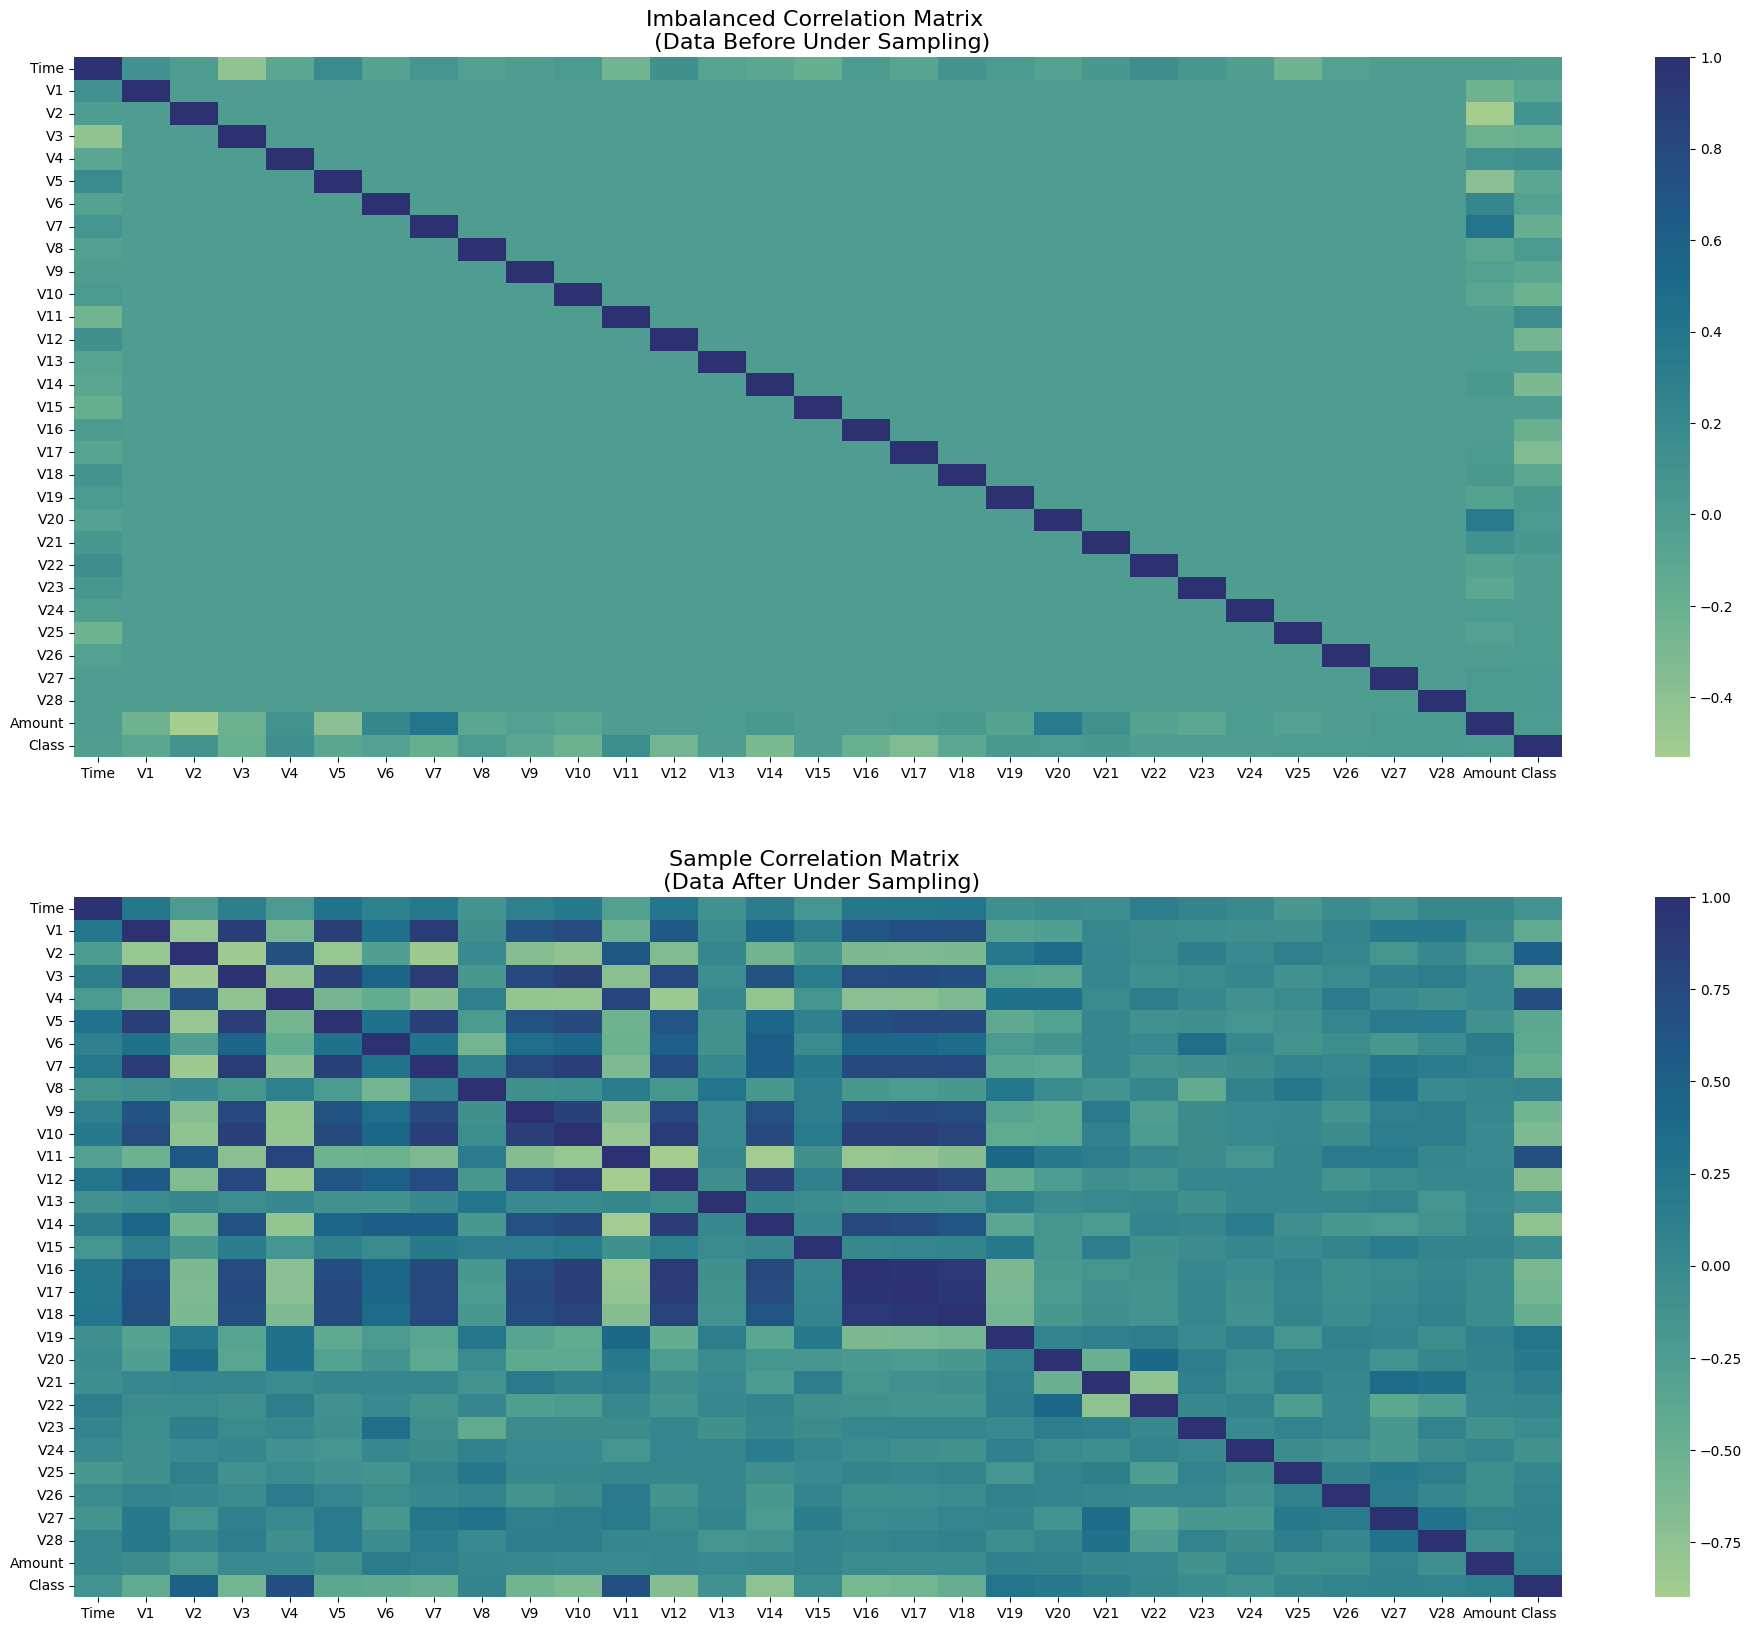

In [219]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# To create heatmap (correlation matrix) of entire dataset.

correlation = df.corr()
sns.heatmap(correlation, cmap='crest', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (Data Before Under Sampling)", fontsize=16)

# To create heatmap of sample dataset.

sample_correlation = new_df.corr()
sns.heatmap(sample_correlation, cmap='crest', annot_kws={'size':20}, ax=ax2)
ax2.set_title('Sample Correlation Matrix \n (Data After Under Sampling)', fontsize=16)

plt.show()



### According to the Sample Correlation Matrix:

####    1. *Positive Correlation*: **V2, V4, V8, V11, V19** show strong positive correlation with our target- Class. The higher these values are, it is likely that the transaction is a fraud transaction.
####   2. *Negative Correlation*: **V3, V9, V10, V12, V14, V17** show strong negative correlation with our target- Class. The lower these values are, it is likely that the transaction is a fraud transaction.

### The above mentioned feature's distribution can be better understood by plotting BoxPlots.

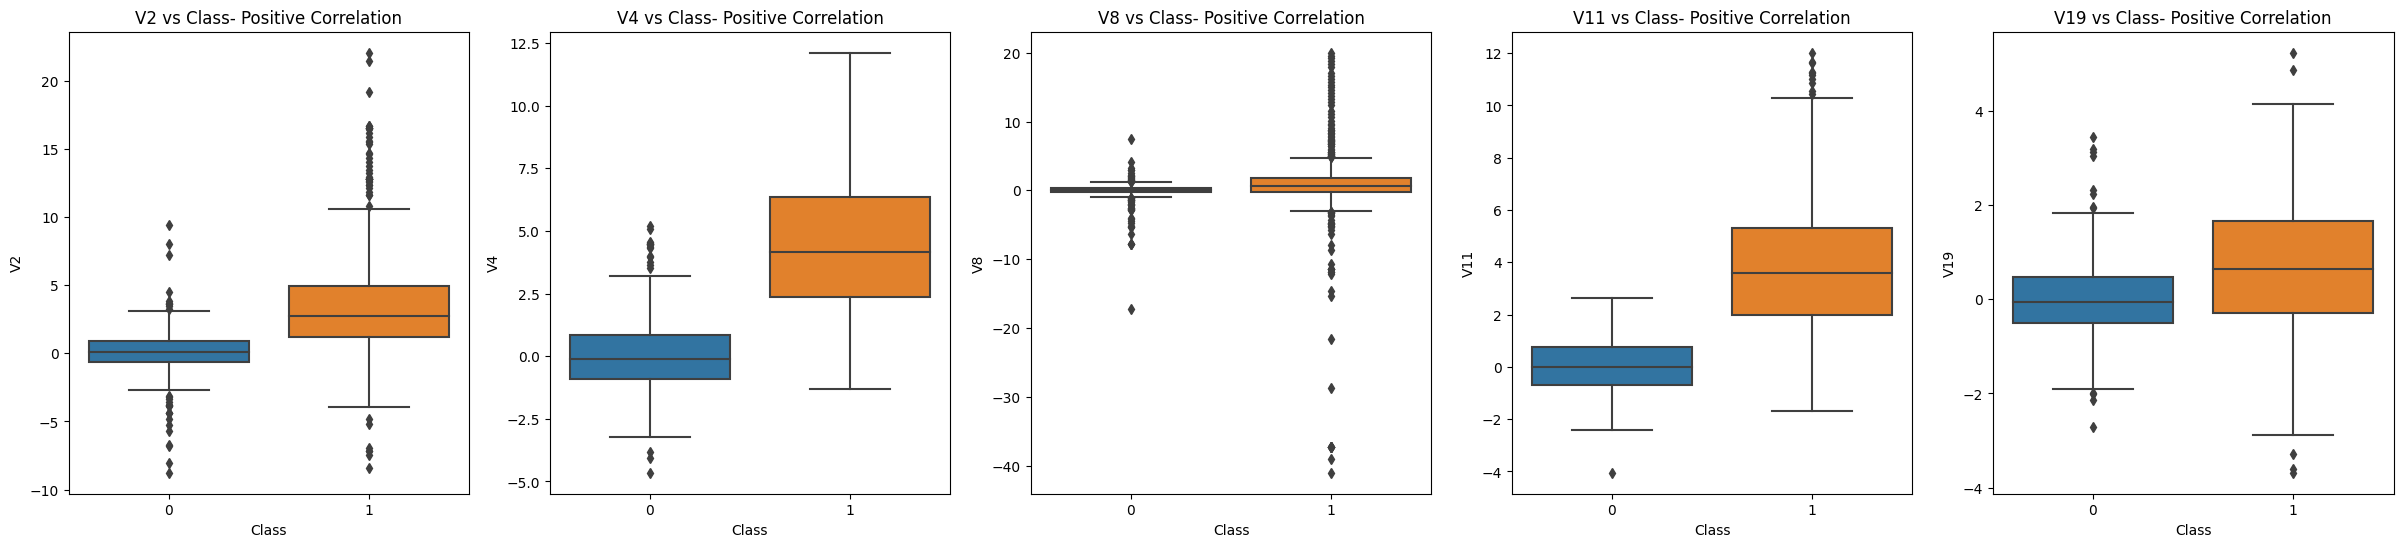

In [241]:
f, axes = plt.subplots(ncols= 5, figsize= (30,6))

# Positive Correlations

sns.boxplot(x="Class", y= "V2", data=new_df, ax=axes[0])
axes[0].set_title("V2 vs Class- Positive Correlation")

sns.boxplot(x="Class", y= "V4", data=new_df, ax=axes[1])
axes[1].set_title("V4 vs Class- Positive Correlation")

sns.boxplot(x="Class", y= "V8", data=new_df, ax=axes[2])
axes[2].set_title("V8 vs Class- Positive Correlation")

sns.boxplot(x="Class", y= "V11", data=new_df, ax=axes[3])
axes[3].set_title("V11 vs Class- Positive Correlation")

sns.boxplot(x="Class", y= "V19", data=new_df, ax=axes[4])
axes[4].set_title("V19 vs Class- Positive Correlation")

plt.show()

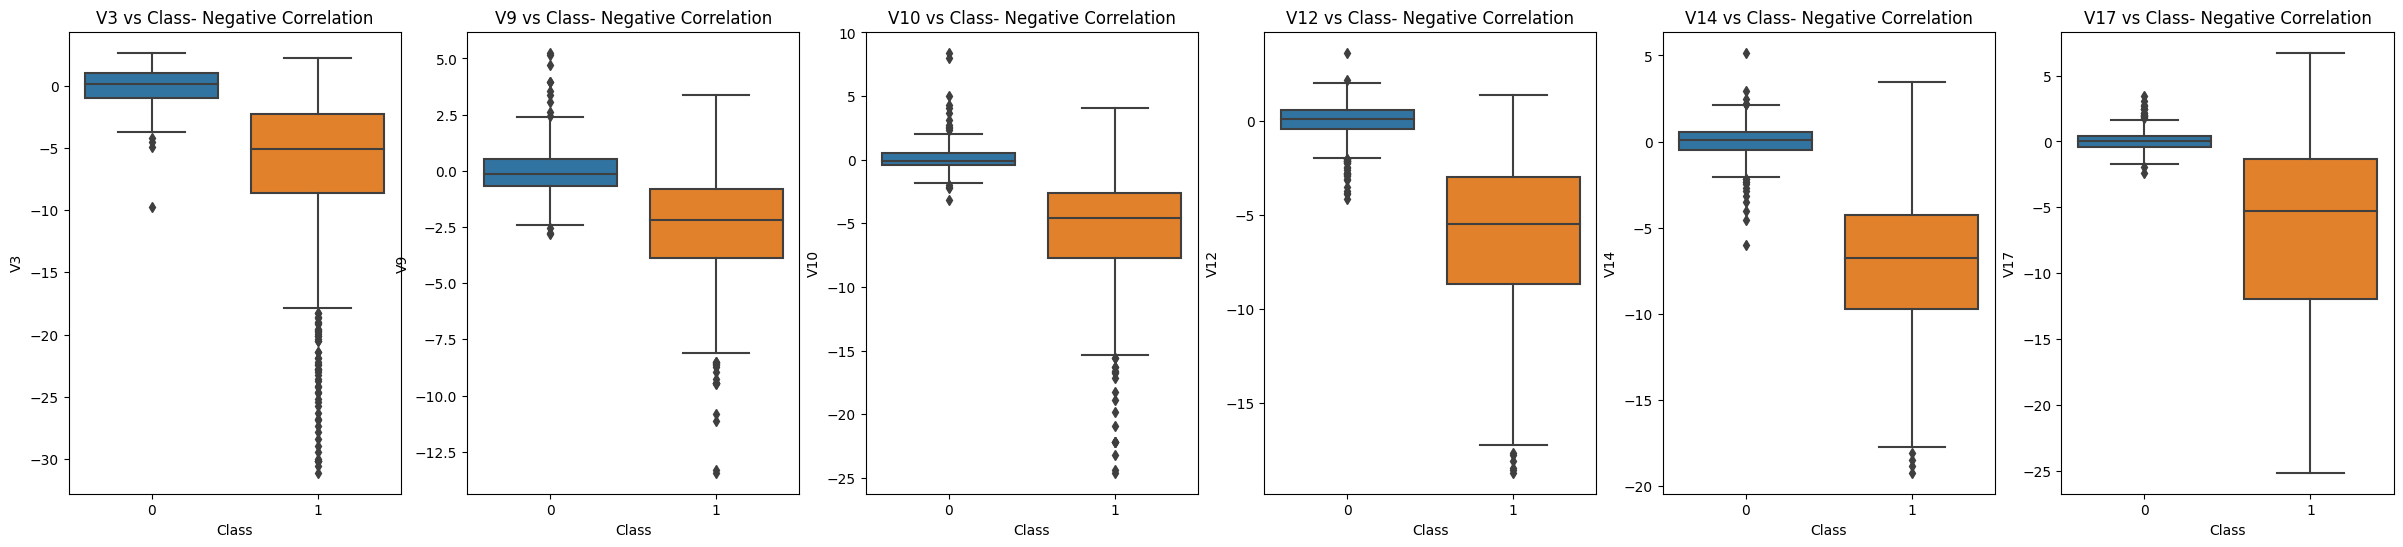

In [221]:
f, axes = plt.subplots(ncols= 6, figsize= (30,6))

# Negative Correlations

sns.boxplot(x="Class", y= "V3", data=new_df, ax=axes[0])
axes[0].set_title("V3 vs Class- Negative Correlation")

sns.boxplot(x="Class", y= "V9", data=new_df, ax=axes[1])
axes[1].set_title("V9 vs Class- Negative Correlation")

sns.boxplot(x="Class", y= "V10", data=new_df, ax=axes[2])
axes[2].set_title("V10 vs Class- Negative Correlation")

sns.boxplot(x="Class", y= "V12", data=new_df, ax=axes[3])
axes[3].set_title("V12 vs Class- Negative Correlation")

sns.boxplot(x="Class", y= "V14", data=new_df, ax=axes[4])
axes[4].set_title("V14 vs Class- Negative Correlation")

sns.boxplot(x="Class", y= "V17", data=new_df, ax=axes[5])
axes[5].set_title("V17 vs Class- Negative Correlation")

plt.show()

## Splitting the data into Features and Target
### Our Target is Class, having values 0 (legit transaction) and 1 (fraud transaction) and Time, V1 to V27 are the features.

In [222]:
X = new_df.drop(columns="Class", axis=1)
y = new_df["Class"]


In [223]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
80588    58557.0  0.981440 -0.780516  1.082248  0.583017 -1.389268 -0.169797   
187852  127717.0 -0.598398  0.309753  1.254221 -0.159055  0.138343  0.064498   
34516    37704.0 -3.073976 -4.390619  0.941011 -0.604751 -4.777473  2.597523   
161781  114517.0  0.055977  0.940435  0.254635 -0.630199  0.574534 -1.017085   
65916    51802.0 -1.132280  0.063209  1.265294 -1.251925 -1.977198  1.578357   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9   

In [224]:
print(y)

80588     0
187852    0
34516     0
161781    0
65916     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


## **Splitting into Train and Test data.**

### The data will be split into two sets using *train_test_split()*.
### One will be the train data (80%) which will be used to train the model, and the other will be test data (20%) upon which testing will be done.

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.2, random_state=1, stratify=y)

In [226]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


## **Model Training**
### Logistic Regression


In [227]:
classifier = LogisticRegression()


In [ ]:
classifier.fit(X_train, y_train)

In [229]:
# accuracy on training data
y_pred = classifier.predict(X_train)
training_data_accuracy = accuracy_score(y_pred, y_train)

In [230]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9428208386277002


In [231]:
# accuracy on test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)

In [232]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9187817258883249


In [236]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

cm = confusion_matrix(y_test,y_pred)

ps = precision_score(y_test,y_pred)

rs = recall_score(y_test, y_pred)

print("Confusion Matrix: \n", cm)
print("Precision Score: ", ps)
print("Recall Score: ", rs)

Confusion Matrix: 
 [[94  4]
 [12 87]]
Precision Score:  0.9560439560439561
Recall Score:  0.8787878787878788


## **Confusion Matrix**

<img src="https://plat.ai/wp-content/uploads/Table1-2.png.webp" title="Confusion Matrix" />

- True Positives (TP): Correctly Classified Fraud Transactions

- False Positives (FP): Incorrectly Classified Fraud Transactions

- True Negative (TN): Correctly Classified Non-Fraud Transactions

- False Negative (FN): Incorrectly Classified Non-Fraud Transactions

- Precision: TP/(TP + FP)

- Recall: TP/(TP + FN)

In [235]:
Xnew = [[12.0,-1.158233,0.877737,1.546518,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99]]

ynew = classifier.predict(Xnew)

print(ynew)

# The output of 0 indicates that the transaction is legit.

[0]


# **Acknowledgements**
### The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.

- Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

- Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. Learned lessons in credit card fraud detection from a practitioner perspective, Expert systems with applications,41,10,4915-4928,2014, Pergamon

- Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. Credit card fraud detection: a realistic modeling and a novel learning strategy, IEEE transactions on neural networks and learning systems,29,8,3784-3797,2018,IEEE

- Dal Pozzolo, Andrea Adaptive Machine learning for credit card fraud detection ULB MLG PhD thesis (supervised by G. Bontempi)

- Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. Scarff: a scalable framework for streaming credit card fraud detection with Spark, Information fusion,41, 182-194,2018,Elsevier

- Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. Streaming active learning strategies for real-life credit card fraud detection: assessment and visualization, International Journal of Data Science and Analytics, 5,4,285-300,2018,Springer International Publishing

- Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection, INNSBDDL 2019: Recent Advances in Big Data and Deep Learning, pp 78-88, 2019

- Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi Combining Unsupervised and Supervised Learning in Credit Card Fraud Detection Information Sciences, 2019

- Yann-Aël Le Borgne, Gianluca Bontempi Reproducible machine Learning for Credit Card Fraud Detection - Practical Handbook

- Bertrand Lebichot, Gianmarco Paldino, Wissam Siblini, Liyun He, Frederic Oblé, Gianluca Bontempi Incremental learning strategies for credit cards fraud detection, IInternational Journal of Data Science and Analytics